In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset=pd.read_csv(r'C:\Users\test01\Desktop\Social_Network_Ads.csv')

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
dataset.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [5]:
dataset=dataset.drop(columns=['User ID'])

In [6]:
dataset

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [7]:
x=dataset.iloc[:,:-1].values

In [8]:
x

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ...,
       ['Female', 50, 20000],
       ['Male', 36, 33000],
       ['Female', 49, 36000]], dtype=object)

In [9]:
y=dataset.iloc[:,-1].values

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [11]:
lb=LabelEncoder()

In [12]:
x[:,0]=lb.fit_transform(x[:,0])

In [13]:
x

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
x_train

array([[1, 58, 144000],
       [0, 59, 83000],
       [0, 24, 55000],
       [0, 26, 35000],
       [0, 58, 38000],
       [0, 42, 80000],
       [0, 40, 75000],
       [1, 59, 130000],
       [0, 46, 41000],
       [0, 41, 60000],
       [1, 42, 64000],
       [0, 37, 146000],
       [0, 23, 48000],
       [1, 25, 33000],
       [1, 24, 84000],
       [0, 27, 96000],
       [1, 23, 63000],
       [1, 48, 33000],
       [1, 48, 90000],
       [1, 42, 104000],
       [0, 44, 39000],
       [1, 32, 120000],
       [0, 38, 50000],
       [0, 32, 135000],
       [0, 52, 21000],
       [0, 53, 104000],
       [1, 39, 42000],
       [1, 38, 61000],
       [0, 36, 50000],
       [0, 36, 63000],
       [0, 35, 25000],
       [1, 35, 50000],
       [1, 42, 73000],
       [0, 47, 49000],
       [0, 59, 29000],
       [1, 49, 65000],
       [0, 45, 131000],
       [0, 31, 89000],
       [0, 46, 82000],
       [0, 47, 51000],
       [1, 26, 15000],
       [1, 60, 102000],
       [0, 38, 112000],
 

In [17]:
x_test

array([[1, 30, 87000],
       [0, 38, 50000],
       [1, 35, 75000],
       [0, 30, 79000],
       [0, 35, 50000],
       [1, 27, 20000],
       [0, 31, 15000],
       [1, 36, 144000],
       [0, 18, 68000],
       [1, 47, 43000],
       [1, 30, 49000],
       [0, 28, 55000],
       [1, 37, 55000],
       [1, 39, 77000],
       [1, 20, 86000],
       [0, 32, 117000],
       [1, 37, 77000],
       [1, 19, 85000],
       [0, 55, 130000],
       [1, 35, 22000],
       [0, 35, 47000],
       [0, 47, 144000],
       [0, 41, 51000],
       [1, 47, 105000],
       [0, 23, 28000],
       [0, 49, 141000],
       [0, 28, 87000],
       [1, 29, 80000],
       [0, 37, 62000],
       [0, 32, 86000],
       [1, 21, 88000],
       [1, 37, 79000],
       [1, 57, 60000],
       [1, 37, 53000],
       [1, 24, 58000],
       [1, 18, 52000],
       [1, 22, 81000],
       [0, 34, 43000],
       [0, 31, 34000],
       [0, 49, 36000],
       [1, 27, 88000],
       [1, 41, 52000],
       [0, 27, 84000],
     

In [18]:
y_train

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,

In [19]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

# Improve model performance(Feature Scaling)

In [20]:
from sklearn.preprocessing import MinMaxScaler # or first do feature Scaling then split into train and test data

In [21]:
sc=MinMaxScaler()

In [22]:
x_train=sc.fit_transform(x_train)#to convert data into scale data

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [23]:
x_train

array([[1.        , 0.95238095, 0.95555556],
       [0.        , 0.97619048, 0.5037037 ],
       [0.        , 0.14285714, 0.2962963 ],
       [0.        , 0.19047619, 0.14814815],
       [0.        , 0.95238095, 0.17037037],
       [0.        , 0.57142857, 0.48148148],
       [0.        , 0.52380952, 0.44444444],
       [1.        , 0.97619048, 0.85185185],
       [0.        , 0.66666667, 0.19259259],
       [0.        , 0.54761905, 0.33333333],
       [1.        , 0.57142857, 0.36296296],
       [0.        , 0.45238095, 0.97037037],
       [0.        , 0.11904762, 0.24444444],
       [1.        , 0.16666667, 0.13333333],
       [1.        , 0.14285714, 0.51111111],
       [0.        , 0.21428571, 0.6       ],
       [1.        , 0.11904762, 0.35555556],
       [1.        , 0.71428571, 0.13333333],
       [1.        , 0.71428571, 0.55555556],
       [1.        , 0.57142857, 0.65925926],
       [0.        , 0.61904762, 0.17777778],
       [1.        , 0.33333333, 0.77777778],
       [0.

In [24]:
x_test=sc.transform(x_test)# transform () used only for test data

In [25]:
x_test

array([[1.        , 0.28571429, 0.53333333],
       [0.        , 0.47619048, 0.25925926],
       [1.        , 0.4047619 , 0.44444444],
       [0.        , 0.28571429, 0.47407407],
       [0.        , 0.4047619 , 0.25925926],
       [1.        , 0.21428571, 0.03703704],
       [0.        , 0.30952381, 0.        ],
       [1.        , 0.42857143, 0.95555556],
       [0.        , 0.        , 0.39259259],
       [1.        , 0.69047619, 0.20740741],
       [1.        , 0.28571429, 0.25185185],
       [0.        , 0.23809524, 0.2962963 ],
       [1.        , 0.45238095, 0.2962963 ],
       [1.        , 0.5       , 0.45925926],
       [1.        , 0.04761905, 0.52592593],
       [0.        , 0.33333333, 0.75555556],
       [1.        , 0.45238095, 0.45925926],
       [1.        , 0.02380952, 0.51851852],
       [0.        , 0.88095238, 0.85185185],
       [1.        , 0.4047619 , 0.05185185],
       [0.        , 0.4047619 , 0.23703704],
       [0.        , 0.69047619, 0.95555556],
       [0.

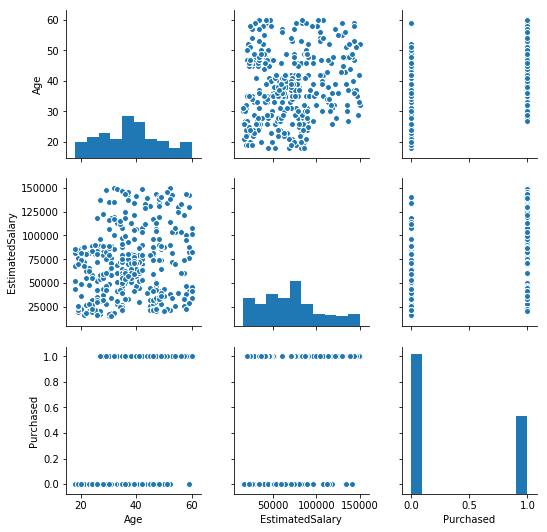

In [26]:
sns.pairplot(dataset)

# LogisticRegression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logr=LogisticRegression()

In [29]:
logr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
y_pred=logr.predict(x_test)

In [31]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [32]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

# For regression Model

In [33]:
from sklearn.metrics import r2_score

In [34]:
r2_score(y_test,y_pred)#should not do for classification model

0.6238244514106583

# For classification Model

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,y_pred)

0.925

In [37]:
logr.predict([[1.0,0.689,0.845]])

array([1], dtype=int64)

In [39]:
logr.predict(sc.transform([[1,68,84500]]))

array([1], dtype=int64)

# Evaluating Model Performance

# (1)confusion matrix

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test,y_pred)

array([[57,  1],
       [ 5, 17]], dtype=int64)

In [43]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [44]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [45]:
y_pred.size

80

In [48]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Prediction-0','Prediction-1'],index=['Actual-0','Actual-1'])

,Prediction-0,Prediction-1
Actual-0,57,1
Actual-1,5,17


# (2)roc

In [50]:
import sklearn.metrics as metrics

In [51]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)

In [52]:
roc=metrics.auc(fpr,tpr)

In [53]:
roc

0.877742946708464

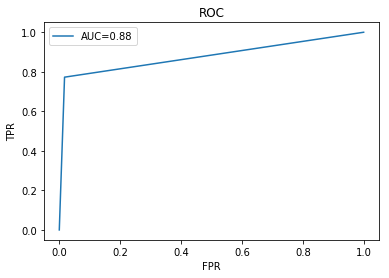

In [58]:
plt.plot(fpr,tpr,label='AUC=%0.2f' % roc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend()